# Introduction to Dynamic Programming 5

In [ ]:
# init

# 72. Edit Distance

#### Difficulty: Medium

## Problem Description

Given two strings `word1` and `word2`, return the minimum number of operations required to convert `word1` to `word2`.

You have the following three operations permitted on a word:
1. Insert a character
2. Delete a character
3. Replace a character

---

## Examples

### Example 1
**Input:**  
`word1 = "horse"`  
`word2 = "ros"`

**Output:**  
`3`

**Explanation:**  
- `horse -> rorse` (replace 'h' with 'r')  
- `rorse -> rose` (remove 'r')  
- `rose -> ros` (remove 'e')  

---

### Example 2
**Input:**  
`word1 = "intention"`  
`word2 = "execution"`

**Output:**  
`5`

**Explanation:**  
- `intention -> inention` (remove 't')  
- `inention -> enention` (replace 'i' with 'e')  
- `enention -> exention` (replace 'n' with 'x')  
- `exention -> exection` (replace 'n' with 'c')  
- `exection -> execution` (insert 'u')  

---

## Constraints

- 0 <= word1.length, word2.length <= 500
- `word1` and `word2` consist of lowercase English letters.


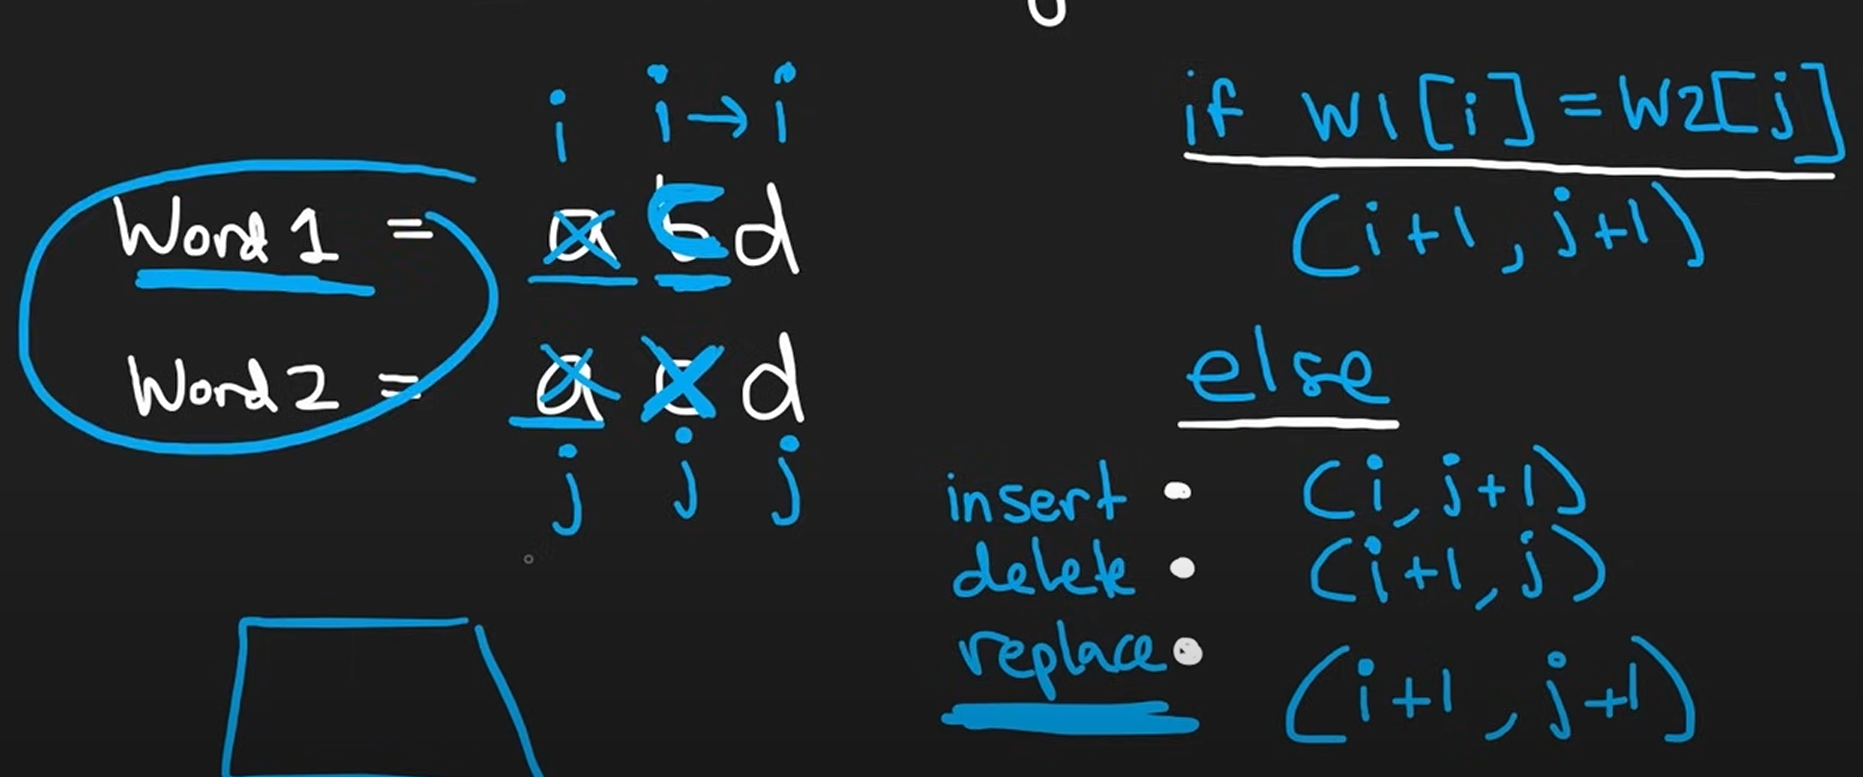

#### insert = [i][j+1]
#### delete = [i+1][j]
#### replace = [i+1][j+1]

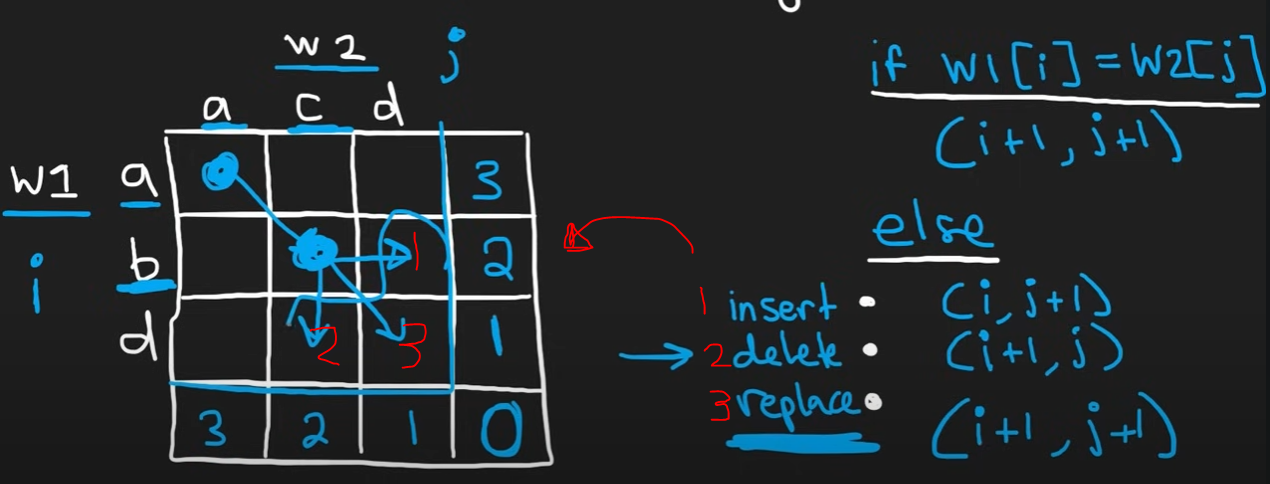

In [ ]:
from collections import deque

In [ ]:
# 18 ms
class Solution(object):
    def minDistance(self, word1, word2):
        m, n = len(word1), len(word2)

        q = deque([(0, 0)])
        numEdits = 0
        visited = set()
        while q:
            qLen = len(q)
            for _ in range(qLen):
                i, j = q.popleft()
                if (i,j) in visited:
                    continue
                visited.add((i,j))

                while i < m and j < n and word1[i] == word2[j]:
                    i += 1
                    j += 1

                if i == m and j == n:
                    return numEdits
                
                q.append((i+1, j)) # delete
                q.append((i+1,j+1)) # replace
                q.append((i,j+1)) # insert
            numEdits += 1
        
        return -1

In [ ]:
# 0 ms runtime
# https://www.youtube.com/watch?v=XYi2-LPrwm4

class Solution(object):
    def minDistance(self, word1, word2):
        """
        :type word1: str
        :type word2: str
        :rtype: int
        """
        cache = [[float('inf')] * (len(word2)+1) for i in range(len(word1)+1)]

        for j in range(len(word2)+1):
            cache[len(word1)][j] = len(word2) - j
        for i in range(len(word1)+1):
            cache[i][len(word2)] = len(word1) - i

        for i in range(len(word1) -1, -1, -1):
            for j in range(len(word2) -1, -1, -1):
                if word1[i] == word2[j]:
                    cache[i][j] = cache[i+1][j+1]
                else:
                    # cache[i][j] = 1 + delete, insert, replace
                    cache[i][j] = 1 + min(cache[i + 1][j], cache[i][j+1], cache[i+1][j+1])
        return cache[0][0]

# 712. Minimum ASCII Delete Sum for Two Strings

#### Difficulty: Medium

---

## Problem Description

Given two strings `s1` and `s2`, return the lowest ASCII sum of deleted characters to make the two strings equal.

---

## Examples

### Example 1

**Input:**  
`s1 = "sea", s2 = "eat"`

**Output:**  
`231`

**Explanation:**  
- Deleting `"s"` from `"sea"` adds the ASCII value of `"s"` (115) to the sum.  
- Deleting `"t"` from `"eat"` adds 116 to the sum.  
- At the end, both strings are equal, and `115 + 116 = 231` is the minimum sum possible to achieve this.

---

### Example 2

**Input:**  
`s1 = "delete", s2 = "leet"`

**Output:**  
`403`

**Explanation:**  
- Deleting `"dee"` from `"delete"` to turn the string into `"let"`, adds `100[d] + 101[e] + 101[e]` to the sum.  
- Deleting `"e"` from `"leet"` adds `101[e]` to the sum.  
- At the end, both strings are equal to `"let"`, and the answer is `100 + 101 + 101 + 101 = 403`.  

If instead we turned both strings into `"lee"` or `"eet"`, we would get answers of `433` or `417`, which are higher.

---

## Constraints

- `1 <= s1.length, s2.length <= 1000`
- `s1` and `s2` consist of lowercase English letters.


In [ ]:
# 
class Solution(object):
    def minimumDeleteSum(self, s1, s2):
        """
        :type s1: str
        :type s2: str
        :rtype: int
        """
        m, n = len(s1), len(s2)
        dp = [[0] * (n + 1) for _ in range(m + 1)]
    
        for i in range(1, m + 1):
            dp[i][0] = dp[i-1][0] + ord(s1[i-1])  # Sum of ASCII values of s1[0..i-1]
        for j in range(1, n + 1):
            dp[0][j] = dp[0][j-1] + ord(s2[j-1])  # Sum of ASCII values of s2[0..j-1]

        for i in range(1, m + 1):
            for j in range(1, n + 1):
                if s1[i-1] == s2[j-1]:
                    dp[i][j] = dp[i-1][j-1] 
                else:
                    dp[i][j] = min(dp[i-1][j] + ord(s1[i-1]), dp[i][j-1] + ord(s2[j-1]))
        
        return dp[m][n]

# 115. Distinct Subsequences

#### Difficulty: Hard  

---

## Problem Description

Given two strings `s` and `t`, return the number of distinct subsequences of `s` which equals `t`.

The test cases are generated so that the answer fits within a 32-bit signed integer.

---

## Examples

### Example 1:
**Input:**  
`s = "rabbbit"`  
`t = "rabbit"`  

**Output:**  
`3`

**Explanation:**  
There are 3 ways you can generate "rabbit" from "rabbbit":
1. `rabbbit`
2. `rabbbit`
3. `rabbbit`

---

### Example 2:
**Input:**  
`s = "babgbag"`  
`t = "bag"`  

**Output:**  
`5`

**Explanation:**  
There are 5 ways you can generate "bag" from "babgbag":
1. `babgbag`
2. `babgbag`
3. `babgbag`
4. `babgbag`
5. `babgbag`

---

## Constraints:
- 1 <= s.length, t.length <= 1000
- s and t consist of English letters.

---

## Notes:
- A **subsequence** of a string is a new string generated from the original string with some characters (can be none) deleted without changing the relative order of the remaining characters.
- The answer should fit within a 32-bit signed integer.


In [ ]:
# time complexity: 0(n*m)
# 1971 ms
class Solution(object):
    def numDistinct(self, s, t):
        """
        :type s: str
        :type t: str
        :rtype: int
        """
        cache = {}

        def dfs(i, j):
            if j == len(t): 
                return 1
            if i == len(s):
                return 0
            if (i,j) in cache:
                return cache[(i,j)]
            if s[i] == t[j]:
                cache[(i,j)] = dfs(i+1, j+1) + dfs(i+1,j)
            else:
                cache[(i,j)] = dfs(i + 1,j)
            return cache[(i,j)]

        return dfs(0,0)

In [ ]:
# 344 ms 
class Solution(object):
    def numDistinct(self, s, t):
        n,m = len(s), len(t)
        dp = [0]*(m+1)
        dp[0] = 1
        for i in range(n):
            for j in range(m,0,-1):
                if s[i] ==t[j-1]:
                    dp[j] +=dp[j-1]
        
        return dp[m]

In [ ]:

# Subsequence: is an array that can be derived from another array by deleting some or no elements without changing the order of the remaining elements.


# 300. Longest Increasing Subsequence

#### Difficulty: Medium  

---

## Problem Description
Given an integer array `nums`, return the length of the **longest strictly increasing subsequence**.

---

## Examples

### Example 1:
**Input:**  
`nums = [10,9,2,5,3,7,101,18]`  
**Output:**  
`4`  
**Explanation:**  
The longest increasing subsequence is `[2,3,7,101]`, so the length is `4`.

---

### Example 2:
**Input:**  
`nums = [0,1,0,3,2,3]`  
**Output:**  
`4`

---

### Example 3:
**Input:**  
`nums = [7,7,7,7,7,7,7]`  
**Output:**  
`1`

---

## Constraints:
- 1 <= nums.length <= 2500
- -10^4 <= nums[i] <= 10^4

---

## Follow-Up:
Can you come up with an algorithm that runs in O(n log(n)) time complexity?
